# Práctica 1. Aprendizaje automático

Grupo 16: Adina Han, Diego Ambite 

## Parte 3: Regresión

0. Antes de empezar vamos a eliminar la variable “Region” del conjunto de datos, ya que no la usaremos para predecir.
Además, utiliza la función dropna que elimina de un data frame todas las filas (es decir, observaciones) que tienen un valor perdido (na quiere decir not available) para alguna variable. De esta forma, no tendrás que preocuparte por imputar un valor a dichas observaciones. Asegúrate de que el dataframe resultante no tiene la variable Region, ni valores perdidos.

In [144]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [145]:
countries = pd.read_csv('countries.csv', index_col = 0) 
countries['GDP'] = countries['GDP (USD per capita)']
countries.drop(['GDP (USD per capita)'], axis='columns', inplace=True)
countries.head()


,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,700.0
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,4500.0
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6000.0
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,8000.0
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,19000.0


In [146]:
countries.drop(['Region'], axis='columns', inplace=True)

In [147]:
countries.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01
Crops (%),225.0,4.564222e+00,8.361470e+00,0.000,0.19000,1.030,4.440000e+00,5.068000e+01


In [148]:
countries.dropna()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,700.0
Albania,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,4500.0
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6000.0
Anguilla,13477,102,132.1,59.80,10.76,21.03,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,8600.0
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,11000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541,4800.0
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381,2500.0
Yemen,21456188,527970,40.6,0.36,0.00,61.50,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,800.0


*Tras cargar el fichero y realizar las modificaciones requeridas podemos observar el Conjunto de datos sin la variable región ni valores not avaliables*

1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, especialmente a la matriz de gráficos de dispersión y al coeficiente de correlación de la variable objetivo (GDP) con el resto de variables. ¿Hay variables que tengan una relación clara con ella?

*El conjunto descibre, para un total de 227 paises, su situacion con respecto a un conjunto de 18 caracteristicas, como si poblacion, su area en millas cuadradas, su densidad de poblacion en personas por milla cuadrada de territorio...
A continuacion se muestra la  totalidad de las caracteristicas y las unidades usadas para ello.*

In [149]:
countries.keys()

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'GDP'],
      dtype='object')

*De entre ellas vamos a seleccionar los que consideramos que estan mas relacionados con el GDP para realizar un estudio mas pormenorizado de ellos.*

In [150]:
correl=countries.corr()
correl['GDP']

Population                           -0.039324
Area (sq. mi.)                        0.072185
Pop. Density (per sq. mi.)            0.195773
Coastline (coast/area ratio)          0.049118
Net migration                         0.382461
Infant mortality (per 1000 births)   -0.600774
Literacy (%)                          0.513144
Phones (per 1000)                     0.834499
Arable (%)                            0.019768
Crops (%)                            -0.219229
Other (%)                             0.097828
Climate                               0.340791
Birthrate                            -0.650137
Deathrate                            -0.201661
Agriculture                          -0.586769
Industry                             -0.028926
Service                               0.550216
GDP                                   1.000000
Name: GDP, dtype: float64

In [151]:
correl[correl['GDP'] > 0.3]['GDP'].sort_values(ascending=False).drop('GDP')

Phones (per 1000)    0.834499
Service              0.550216
Literacy (%)         0.513144
Net migration        0.382461
Climate              0.340791
Name: GDP, dtype: float64

*Como podemos observar las mas correlacionadas con el GDP son las que tienen un valor mas alto, que son las siguientes:*
    * Phones (per 1000)
    * Birthrate
    * Infant mortality (per 1000 births)
    * Agriculture
    * Service 
    * Literacy (%)

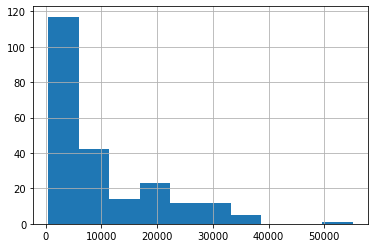

In [152]:
countries.GDP.hist()

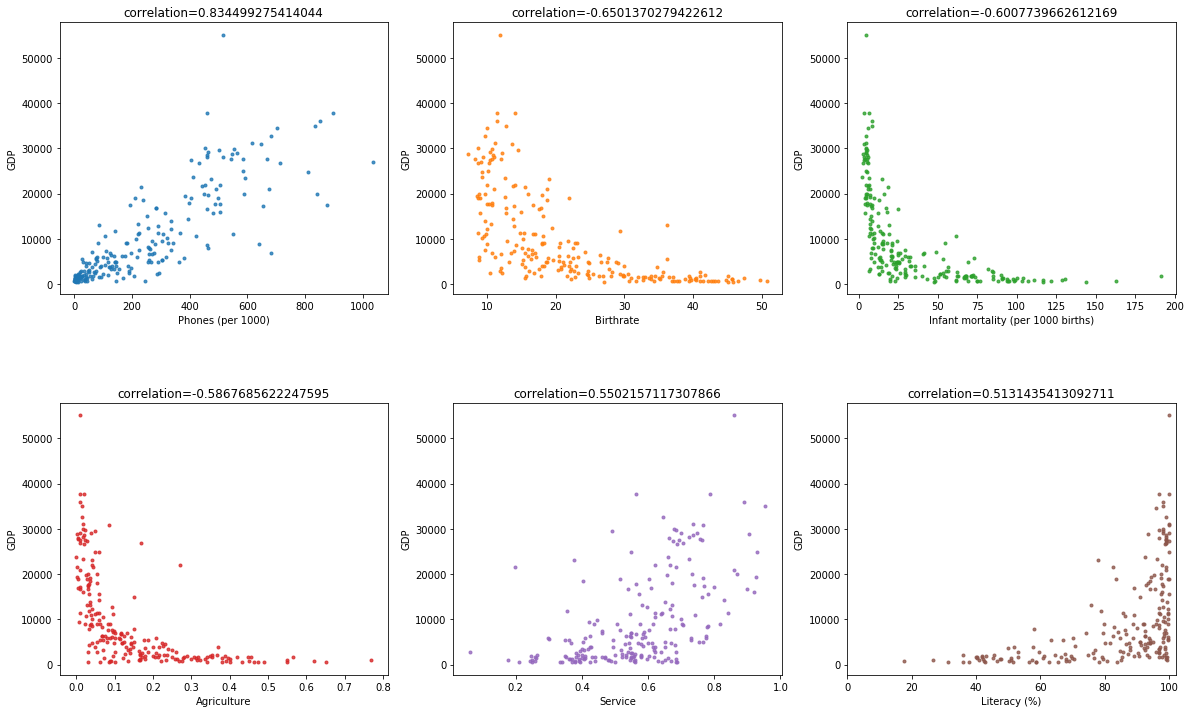

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in countries.columns.values[2:]:
    if ((col!='GDP')&(col!='Climate')):
        corr_to_gdp[col] = countries['GDP'].corr(countries[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP', data=countries,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

2. Establece un criterio en base al coeficiente de correlación para filtrar aquellas variables que tengan poca relación (ya sea directa o inversa) con la variable objetivo. Di qué variables pasan tu filtro y qué coeficiente de correlación tienen con ella.

In [154]:
correl[correl['GDP'] < 0.0]['GDP'].sort_values(ascending=True)

Birthrate                            -0.650137
Infant mortality (per 1000 births)   -0.600774
Agriculture                          -0.586769
Crops (%)                            -0.219229
Deathrate                            -0.201661
Population                           -0.039324
Industry                             -0.028926
Name: GDP, dtype: float64

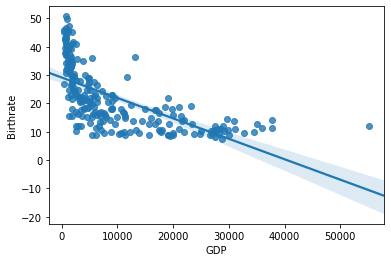

In [155]:
sns.regplot(x="GDP", y="Birthrate", data = countries)

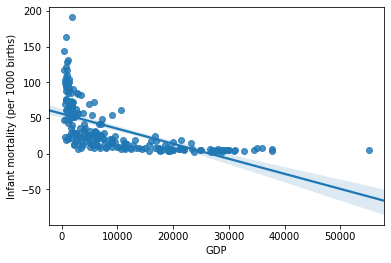

In [156]:
sns.regplot(x="GDP", y="Infant mortality (per 1000 births)", data = countries)

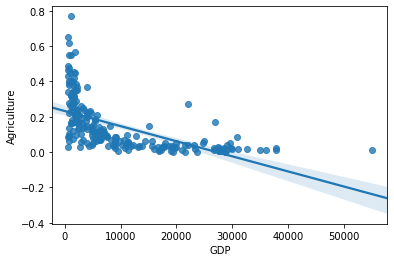

In [157]:
sns.regplot(x="GDP", y="Agriculture", data = countries)

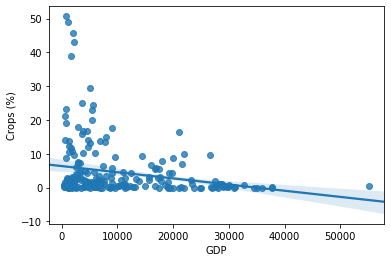

In [158]:
sns.regplot(x="GDP", y="Crops (%)", data = countries)

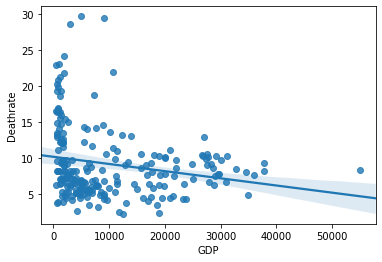

In [159]:
sns.regplot(x="GDP", y="Deathrate", data = countries)

In [160]:
df = pd.DataFrame(data=countries) 
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,700.0
Albania,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,4500.0
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6000.0
American Samoa,57794,199,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,8000.0
Andorra,71201,468,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,2460492,5860,419.9,0.00,2.98,19.62,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,800.0
Western Sahara,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400,NaN
Yemen,21456188,527970,40.6,0.36,0.00,61.50,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,800.0


In [161]:
df = df.dropna()

In [162]:
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,700.0
Albania,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,4500.0
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6000.0
Anguilla,13477,102,132.1,59.80,10.76,21.03,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,8600.0
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,11000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541,4800.0
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381,2500.0
Yemen,21456188,527970,40.6,0.36,0.00,61.50,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,800.0


3. Considera si debes normalizar o estandarizar las variables antes para usar un perceptrón multicapa de decisión. Razona tu elección.

In [163]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(df)
countries_scaled=scaler_x.transform(df)
countries_scaled


array([[-0.02402789,  0.05986479, -0.17943007, ..., -0.3432598 ,
        -1.05630628, -0.87611209],
       [-0.23313231, -0.38471982, -0.123741  , ..., -0.7149083 ,
         0.14824877, -0.48098449],
       [-0.00977248,  1.30594788, -0.20429386, ...,  2.22969138,
        -1.55265559, -0.32501307],
       ...,
       [-0.09709601, -0.0260197 , -0.18480996, ...,  1.3148643 ,
        -0.97761675, -0.86571399],
       [-0.17285349,  0.13539111, -0.20320335, ...,  0.01409453,
        -0.39652487, -0.86571399],
       [-0.16726125, -0.12473692, -0.19157116, ..., -0.32181854,
         0.14824877, -0.75133495]])

In [164]:
# Y también transformamos la variable de salida
scaler_y = StandardScaler()
data = countries_scaled[:,17] 
scaler_y.fit(data.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(data.reshape(-1, 1))



4. Configura una validación cruzada con k=5 y dos perceptrones multicapa

      • MLP1 con una capa oculta de 200 neuronas

      • MLP2 con dos capas ocultas de 50 neuronas cada una

Pinta la curva de aprendizaje para cada perceptrón variando el parámetro alpha que controla el aprendizaje del perceptrón y determina el valor óptimo (es decir aquel que maximiza el Mean Square Error en negativo).
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).
¿Alguno de los dos perceptrones domina al otro? ¿Por qué crees que se producen las diferencias?

In [165]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean1=[]
cv_scores_mean2=[]
cv_scores_std1=[]
cv_scores_std2=[]

for regul_param in regul_param_range:
    print("regul_param", regul_param)
    # aumentamos el parámetro max_iter hasta que converja
    mlp1=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=350, random_state=333)
    mlp2=MLPRegressor(hidden_layer_sizes=(50,50 ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=350, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores1 = cross_val_score(mlp1, countries_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    scores2 = cross_val_score(mlp2, countries_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_scores_mean1.append(scores1.mean())
    print("mean1", scores1.mean())
    cv_scores_mean2.append(scores2.mean())
    print("mean2", scores2.mean())
    cv_scores_std1.append(scores1.std())
    cv_scores_std2.append(scores2.std())



regul_param 0.1
mean1 -0.019883554138594804
mean2 -0.013560396991010807
regul_param 0.01
mean1 -0.024001305665342792
mean2 -0.03474050233030067
regul_param 0.001
mean1 -0.024322006113129197
mean2 -0.03480750933585922
regul_param 0.0001
mean1 -0.02432997841052429
mean2 -0.034847274654502505
regul_param 1e-05
mean1 -0.024332184056544456
mean2 -0.03456708334115867
regul_param 1e-06
mean1 -0.024332768901248174
mean2 -0.03436942542054654


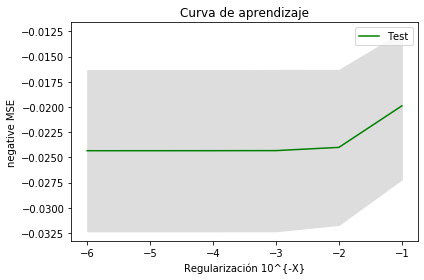

In [166]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean1, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean1)-np.array(cv_scores_std1)
upper_limit=np.array(cv_scores_mean1)+np.array(cv_scores_std1)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

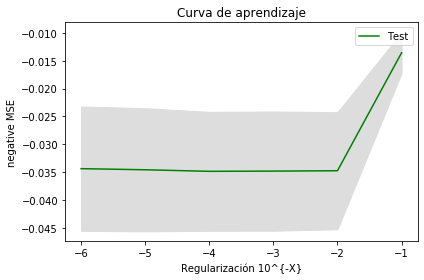

In [167]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean2)-np.array(cv_scores_std2)
upper_limit=np.array(cv_scores_mean2)+np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

* Para ver el perceptron que domina al otro hemos mirado los valores de neg_mean_squared_error, cuanto mas se acerquen a 0 menos error habrá y por tanto será mejor. 
* En nuestro caso el primero percetron(el de una capa con 200 neuronas) tiene mejor valor por lo tanto es el que vamos a elegir para entrenarlo. 

5. Entrena el perceptrón elegido con todo el conjunto de datos y genera las predicciones del GDP que hace el perceptrón para todo los países.
A continuación, píntalas en un diagrama de dispersión frente a los valores observados para el GDP (en el eje Y) y pinta la recta que se genera con la predicción perfecta de todos los valores.
Detecta países para los cuales el perceptrón a infraestimado más su GDP (aproximadamente). Idem con países donde se ha sobreestimado mucho su GDP. ¿Puedes aventurar alguna razón por la que esos países tienen más (o menos) GDP del que el perceptrón les asigna? ¿Es realmente un problema del perceptrón o eres capaz de ver alguna razón económica, política o social?

In [168]:
from sklearn.model_selection import cross_val_predict
predicts_scaled = cross_val_predict(mlp1, countries_scaled, target_scaled.ravel(), cv=5)


# escalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)



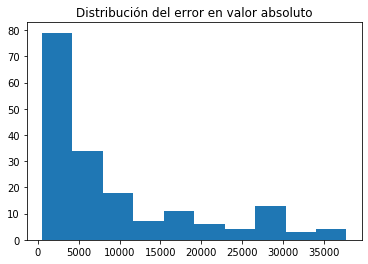

In [169]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(df['GDP'] - predicts))  # np.abs(boston.target - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto')
plt.show()

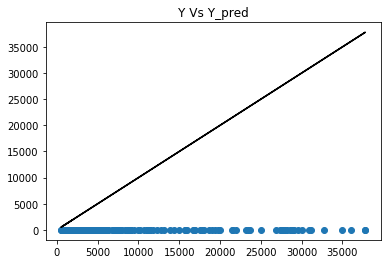

In [170]:
fig2 = plt.figure()
ax2 = plt.axes()
# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df['GDP'], predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df['GDP'], df['GDP'], color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Text(0.5, 1.0, 'training forecasting GDP')

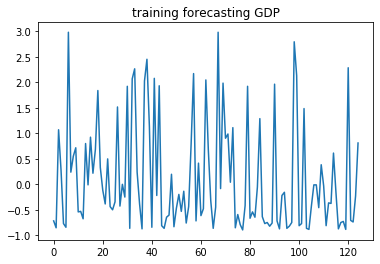

In [192]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(countries_scaled, target_scaled.ravel(), test_size=0.3, random_state=333)

plt.plot(y_train)
plt.title('training forecasting GDP')

In [193]:
mlp1.fit(X_train,y_train)

train_mse = mlp1.predict(X_train)
test_mse = mlp1.predict(X_test)
print ('MSE training', mean_squared_error(train_mse,y_train))
print ('MSE testing', mean_squared_error(test_mse,y_test))

MSE training 0.0034236328991041607
MSE testing 0.02750637572247933


Text(0.5, 1.0, 'training result')

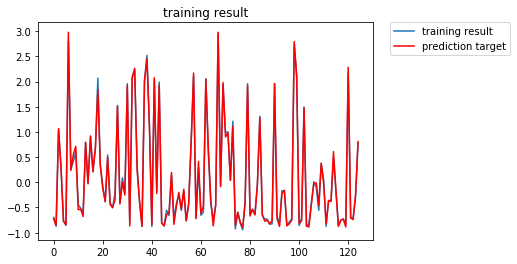

In [194]:
train_pred = mlp1.predict(X_train)
test_pred = mlp1.predict(X_test)

plt.plot(train_pred,label='training result')
plt.plot(y_train,color='red', label='prediction target')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('training result')

Text(0.5, 1.0, 'testing result')

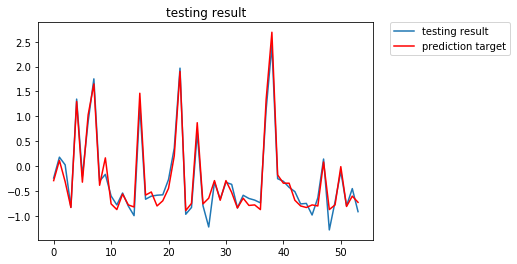

In [195]:
plt.plot(test_pred,label='testing result')
plt.plot(y_test,color='red',label='prediction target')
#plt.legend('test,prediction', ncol=2, loc='upper left');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('testing result')